# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [1]:
! git clone https://github.com/karen-tran08/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 27 (delta 6), reused 4 (delta 4), pack-reused 17 (from 1)
Receiving objects: 100% (27/27), 39.78 KiB | 7.96 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Download complete
Extracting data files...
Data extracted


In [2]:
import numpy as np # gives numerical processsing
import pandas as pd # gives data frames
import seaborn as sns # gives us plottings methods

df = pd.read_csv('./data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
df['Price'].describe()

,Price
count,30478
unique,511
top,150
freq,1481


In [4]:
# Q1.1

df['Price'].str.replace(',','') # replacing common values with nothing to avoid misreading
pd.to_numeric(df['Price'], errors='coerce') # changing the price variable into numeric values instead of objects

,Price
0,145.0
1,37.0
2,28.0
3,199.0
4,549.0
...,...
30473,300.0
30474,125.0
30475,80.0
30476,35.0


When the price goes over 999 dollars, the values are not being converted into float and thus, recorded as missing values because they have commas in them. The Pandas to.numeric() function can't process commas normally, so we have to remove the commas before running this function.

In [5]:
# Q1.2

gdf = pd.read_csv('./data/mn_police_use_of_force.csv', encoding='latin1')
gdf.head()


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [6]:
print(gdf['subject_injury'].isna().sum())


9848


In [7]:
print(gdf['force_type'].isna().sum())


0


Out of 12925 entries, 9848 are 'NaN' for the subject_injury column. (About 76% of the people in the records did not report whether or not they were injured by the police)

In [8]:
gdf['subject_injury'].str.replace('NaN', 'Missing')
pd.crosstab(gdf['subject_injury'], gdf['force_type'], dropna=True, normalize=True)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0.00000,0.355216,0.042574,0.00065,0.010725,0.01105,0.000325,0.00065,0.048749
Yes,0.00065,0.417940,0.013325,0.00000,0.014300,0.01300,0.000650,0.01430,0.055899


In [9]:
# Q1.3
hdf = pd.read_csv('./data/metabric.csv', encoding='latin1')

In [10]:
hdf['Overall Survival Status (binary)'] = hdf['Overall Survival Status'].apply(lambda x: 0 if 'DECEASED' in x.upper() else (1 if 'LIVING' in x.upper() else np.nan))
print(hdf[['Overall Survival Status', 'Overall Survival Status (binary)']].head())
print(hdf['Overall Survival Status (binary)'].value_counts(dropna=False))

  Overall Survival Status  Overall Survival Status (binary)
0                0:LIVING                                 1
1              1:DECEASED                                 0
2                0:LIVING                                 1
3              1:DECEASED                                 0
4              1:DECEASED                                 0
Overall Survival Status (binary)
0    768
1    575
Name: count, dtype: int64


In [11]:
# Q1.4

print(df['Review Scores Rating (bin)'].isna().sum()) # Total number of missing values is 8323

8323


In [12]:
imputation_value = df['Review Scores Rating (bin)'].median()
df['Review Scores Rating (bin)_imp'] = df['Review Scores Rating (bin)'].fillna(imputation_value)
print(df[['Review Scores Rating (bin)', 'Review Scores Rating (bin)_imp']].head())
print(df['Review Scores Rating (bin)_imp'].isna().sum()) # Should be 0 missing values

   Review Scores Rating (bin)  Review Scores Rating (bin)_imp
0                         NaN                            90.0
1                         NaN                            90.0
2                         NaN                            90.0
3                         NaN                            90.0
4                        95.0                            95.0
0


Imputing missing values with the median can introduce bias because it replaces all missing values with the median, which reduces the variability of the column, "Review Scores Rating." This might distort the relationships between 'Review Scores Rating' and all the other variables in the data since the imputed values don't reflect the actual variation, which might alter the correlation coefficient.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [15]:
sdf = pd.read_excel('./GSAF5.xls')

In [16]:
sdf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
source_column_index = sdf.columns.get_loc('Source')
sdf = sdf.iloc[:, :source_column_index + 1]
sdf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,Serious Leg injuries,N,1820hrs,5m shark species not determined,9 News: Bob Myatt GSAF
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,Serious leg injuries,Y,1620hrs,Bull shark,Bob Myatt GSAF
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,Puncture mark to left thumb,N,0540hrs,Unknown,Bob Myatt GSAF


I noticed that all the columns after 'Source' were all 'Nan' values so I removed them using the .iloc function. Removing these columns helps make the data easier to read and analyze.

In [21]:
sdf['Year'].describe()

,Year
count,7068.000000
mean,1935.953311
std,270.740135
min,0.000000
25%,1948.000000
50%,1986.000000
75%,2010.000000
max,2026.000000


In [28]:
# Cleaning 'Year' column
current_year = 2026
sdf['Year'] = pd.to_numeric(sdf['Year'], errors='coerce')
sdf.loc[(sdf['Year'] < 1000) | (sdf['Year'] > current_year), 'Year'] = np.nan

count    5460.000000
mean     1991.940659
std        24.077091
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2024.000000
Name: Year, dtype: float64


In [29]:
sdf = sdf[sdf['Year'] >= 1940]
sdf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
7,21st December,2016.0,Unprovoked,Australia,Western Australia,Ocean Reef North Perth,SCUBA Diving,Tanveer Dhillon,M,?,None to report,N,?,Great White Shark,7 News: Facebook: Bob Myatt GSAF
73,2024-12-30 00:00:00,2024.0,Unprovoked,Mozambique,?,?,Diving,Unknown Male,M,?,Diving for sea urchins attacked by shark injur...,Y,?,Unknown,Kevin McMurray Trackingsharks.com
74,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,Injuries to stomach preventing attack on friend,N,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...
75,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,Entire calf muscle removed and bitten both arm...,Y,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...
76,2024-12-28 00:00:00,2024.0,Unprovoked,Australia,Queensland,Humpy Island Great Keppel Island,Spearfishing,Luke Walford,M,40,Life threatening injuries to neck and arm,Y,1637hr,Unknown,Todd Smith Glen Folkard ABC News: The North We...


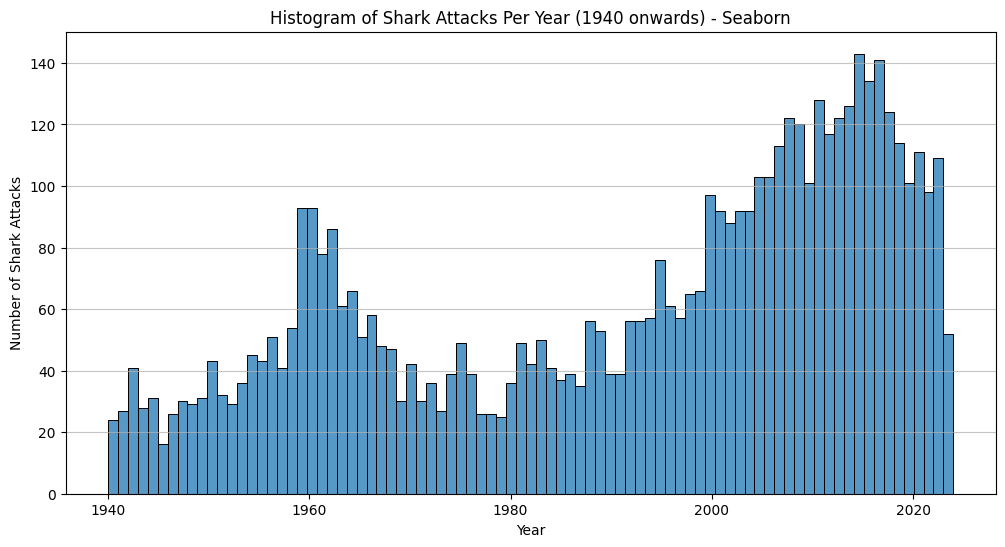

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

attacks_per_year = sdf.groupby('Year').size().reset_index(name='Number of Attacks')

plt.figure(figsize=(12, 6))
sns.histplot(data=attacks_per_year, x='Year', weights='Number of Attacks', bins=attacks_per_year['Year'].nunique(), kde=False, edgecolor='black')
plt.title('Histogram of Shark Attacks Per Year from 1940')
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram of shark attack trends since 1940 shows a general increasing trend in the number of recorded shark attacks over time. While there are fluctuations year-to-year, the overall trend is increasing.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. The paper is about the concept of "data tidying" which explains how to efficiently clean data sets for more efficient data analyses.

2. The "tidy data standard" strives to organize data in such a way that makes data cleaning easier/more efficient as well as data analyses.

3.

  Quote 1: The characteristics that makes a dataset "tidy" is the same or similar for all datasets, but the things that make messy data sets "messy" can vary.

  Quote 2: Variables should be chosen to make analyses easier. We want the relatinoship between columns/variables to be easy to describe and comparisons between rows/observations to be clear and easy to make.


4. Values are items within a dataset and can be quantitative (numbers) or qualitative (strings). Each value belongs to a variable and an observation. A single variable includes all values measuring the same feature across units, while an observation includes all the values measured across the same unit.

5. Tidy data is defined as "a standard way of mapping the meaning of a dataset to its structure."

6. The 5 most common problems with messy data sets:

    (1) Column headers are values instead of variable names
    (2) Multiple variables defined under the same column
    (3) Variables are stored in both columns and rows
    (4) Multiple types of observational units are stored in the same table
    (5) A single observational unit is stored in multiple tables

  Table 4 is messy because the column headers are values rather than variable names. The variables are shown in both the rows and columns.

  Melting = turning columns into rows, resulting in a molten dataset

7. Table 11 is messy because the days are values and should not be columns. Table 12 has distinct variables for columns, omits the year and month columns into a date column and the measured varaibles 'tmax' and 'tmin' have clear values for each. Each row represents the meteorological measurements for a single day/observation.  


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [31]:
fdf = pd.read_csv('./data/ForeignGifts_edu.csv', encoding='latin1')
fdf.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


Text(0.5, 0, 'Foreign Gift Amount')

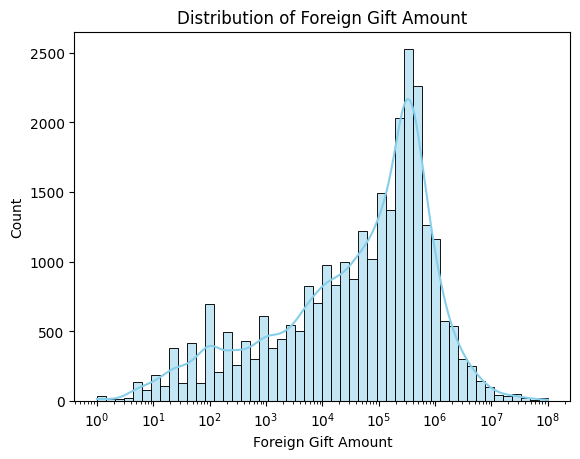

In [45]:
sns.histplot(fdf['Foreign Gift Amount'], bins=50, kde=True, log_scale=True, color='skyblue')
plt.title('Distribution of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')

The distribution of Foreign Gift Amount is skewed. Most amounts are at the lower end of the spectrum, which shows that most of the gifts amounts are relatively small. As the gift amount increases, the frequency of such gifts decreases significantly. There is a long tail to the right, since there are few large gift amounts (outliers) that makes the average larger but do not represent the typical gift size.

<Axes: xlabel='Gift Type', ylabel='Count'>

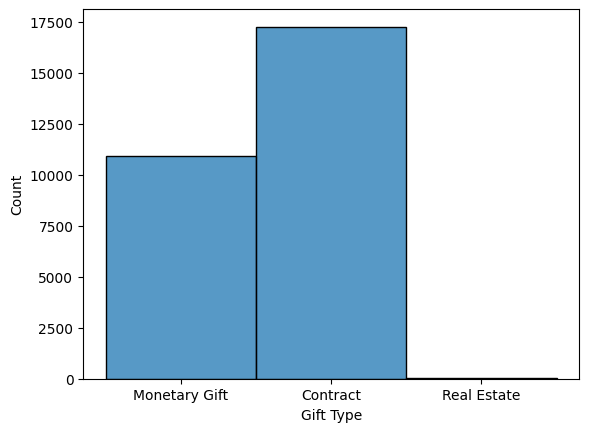

In [46]:
sns.histplot(fdf['Gift Type'])
plt.title('Distribution of Gift Type')

In [50]:
gift_type_counts = fdf['Gift Type'].value_counts()
total_gifts = gift_type_counts.sum()

proportion_contract = gift_type_counts.get('Contract', 0) / total_gifts
proportion_real_estate = gift_type_counts.get('Real Estate', 0) / total_gifts
proportion_monetary_gift = gift_type_counts.get('Monetary Gift', 0) / total_gifts

print(proportion_contract)
print(proportion_real_estate)
print(proportion_monetary_gift)

0.6120973742957372
0.00038978065979235324
0.3875128450444704


The majority of the gifts are contracts (61.2%), 38.7% of the gifts are monetary, and 0.03% of the gifts are real estate.

In [60]:
# Top 15 countries by number of gifts
fdf['Country of Giftor'].value_counts().head(15)


,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [58]:
# Top 15 countries by amount given
fdf.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [61]:
fdf.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


Text(0, 0.5, 'Number of Institutions')

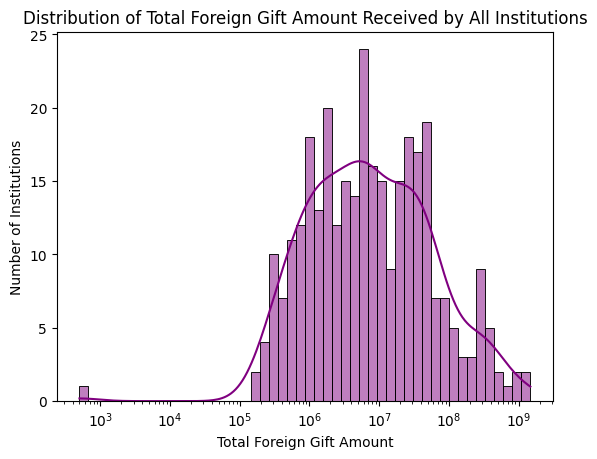

In [65]:
total_amount_per_institution = fdf.groupby('Institution Name')['Foreign Gift Amount'].sum()
sns.histplot(total_amount_per_institution, bins=50, kde=True, log_scale=True, color='purple')
plt.title('Distribution of Total Foreign Gift Amount Received by All Institutions')
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Number of Institutions')


In [64]:
# Which giftors provide the most money, in total?
fdf.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(10)


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?